## Extract Tables

In [1]:
from PIL import Image
import sys 
from pdf2image import convert_from_path 
import os, glob, re
from os import listdir
from PyPDF2 import PdfFileWriter, PdfFileReader
import boto3
import pandas as pd
from trp import Document

In [2]:
import os
import glob

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dirpath = os.getcwd()
dirpath

'C:\\Users\\Diego\\Desktop\\amazonTextractTables'

In [5]:
dirpath = os.getcwd() # path
#dirpath = 'C:\\Users\\Diego\\Desktop\\amazonTextractTables\\'
os.chdir("input_pdf_here") #MEJORAR
for file in glob.glob("*.pdf"):
    print(file)
    input_pdf = file
    break
pdf_input_dir = os.getcwd() # directorio actualizado

input_pdf_fullpath = os.path.join(dirpath, "input_pdf_here", input_pdf) # input 
#pdf_output_dir = os.path.join(dirpath, "output_is_here", "output.pdf") # output

def map_blocks(blocks, block_type):
    return {
        block['Id']: block
        for block in blocks
        if block['BlockType'] == block_type
    }

def get_children_ids(block):
    for rels in block.get('Relationships', []):
        if rels['Type'] == 'CHILD':
            yield from rels['Ids']

mecanica.pdf


In [6]:
pdf_input_dir

'C:\\Users\\Diego\\Desktop\\amazonTextractTables\\input_pdf_here'

In [7]:
input_pdf_fullpath

'C:\\Users\\Diego\\Desktop\\amazonTextractTables\\input_pdf_here\\mecanica.pdf'

In [8]:
#Script final
# Contador para almacenar imágenes de cada página de PDF a imagen
# Counter for storing images of each PDF page to image
# Read all the pdf in the input_pdf_here files
image_counter = 1
for file in glob.glob(dirpath+"\\input_pdf_here\\*.pdf"):
    print(file)
    #print(dirpath+"\\"+"input_pdf_here"+"\\"+file)
    #input_pdf = dirpath+"\\"+"input_pdf_here"+"\\"+file
    # Almacenar todas las páginas del PDF en una variable
    # Store all pages of the PDF in one variable
    pages = convert_from_path(file, 500) # PATH POPPLER


    # Iterar a través de todas las páginas almacenadas anteriormente
    # Iterate through all previously stored pages
    for page in pages:
        print(image_counter)
        print(f"convert pdf to jpg on page: {page}")
        # PDF page n -> page_n.jpg 
        filename = "page_"+str(image_counter)+".jpg"
        # Guardar la imagen de la página en el sistema
        # Save page image in the system
        page.save(filename, 'JPEG') 
        # Incrementa el contador para actualizar el nombre del archivo
        # Increment counter to update the file name
        image_counter = image_counter + 1
        print(f"Ready for the page: {page}")

C:\Users\Diego\Desktop\amazonTextractTables\input_pdf_here\mecanica.pdf
1
convert pdf to jpg on page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4344x5684 at 0x2357D2FA910>
Ready for the page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4344x5684 at 0x2357D2FA910>
2
convert pdf to jpg on page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4344x5684 at 0x2357D2FA940>
Ready for the page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4344x5684 at 0x2357D2FA940>
3
convert pdf to jpg on page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4344x5684 at 0x235046EA3A0>
Ready for the page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4344x5684 at 0x235046EA3A0>
C:\Users\Diego\Desktop\amazonTextractTables\input_pdf_here\mecanica6yTemp.pdf
4
convert pdf to jpg on page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4134x5493 at 0x235046EA460>
Ready for the page: <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4134x5493 at 0x235046EA460>
5


In [83]:
''' 
Part #1 : Convertir pdf a imagenes / Convert pdf to image

# Almacenar todas las páginas del PDF en una variable
# Store all pages of the PDF in one variable
pages = convert_from_path(input_pdf_fullpath, 500, poppler_path="C:\\Users\\Diego\\Desktop\\amazonTextractTables\\poppler-0.68.0\\bin") # PATH POPPLER

# Contador para almacenar imágenes de cada página de PDF a imagen
# Counter for storing images of each PDF page to image
image_counter = 1
# Iterar a través de todas las páginas almacenadas anteriormente
# Iterate through all previously stored pages
for page in pages: 
    print(f"convert pdf to jpg on page: {page}")
    # PDF page n -> page_n.jpg 
    filename = "page_"+str(image_counter)+".jpg"
    # Guardar la imagen de la página en el sistema
    # Save page image in the system
    page.save(filename, 'JPEG') 
    # Incrementa el contador para actualizar el nombre del archivo
    # Increment counter to update the file name
    image_counter = image_counter + 1
    print(f"Ready for the page: {page}")   
'''

' \nPart #1 : Convertir pdf a imagenes / Convert pdf to image\n\n# Almacenar todas las páginas del PDF en una variable\n# Store all pages of the PDF in one variable\npages = convert_from_path(input_pdf_fullpath, 500, poppler_path="C:\\Users\\Diego\\Desktop\\amazonTextractTables\\poppler-0.68.0\\bin") # PATH POPPLER\n\n# Contador para almacenar imágenes de cada página de PDF a imagen\n# Counter for storing images of each PDF page to image\nimage_counter = 1\n# Iterar a través de todas las páginas almacenadas anteriormente\n# Iterate through all previously stored pages\nfor page in pages: \n    print(f"convert pdf to jpg on page: {page}")\n    # PDF page n -> page_n.jpg \n    filename = "page_"+str(image_counter)+".jpg"\n    # Guardar la imagen de la página en el sistema\n    # Save page image in the system\n    page.save(filename, \'JPEG\') \n    # Incrementa el contador para actualizar el nombre del archivo\n    # Increment counter to update the file name\n    image_counter = image_cou

In [9]:
image_counter

6

In [10]:
''' 
Part #2 - Reconocer el texto de las imágenes mediante OCR / Recognize text in images using OCR
'''

original_pages = [] # remember that page numbering starts with 0 / recordar que la numeración de las páginas empieza por el 0 
keep_pages = [] # remember that page numbering starts with 0 / recordar que la numeración de las páginas empieza por el 0
dataframes = []

# Variable to obtain the count of the total number of pages  / Variable para obtener el recuento del número total de páginas  
filelimit = image_counter-1


# Creación de un archivo de texto para escribir la salida
# Creation of a text file for writing the output
for i in range(1, filelimit + 1):
    print(f"Image recognition for image #:{i}")
    # Documento
    filename = "page_"+str(i)+".jpg"
    #outfile = "page_"+str(i)+".txt"
    #f = open(outfile, "w")

    print("AWS api entry")
    # Amazon Textract
    textract = boto3.client('textract')

    #  Call to Amazon Textract / Llamada a Amazon Textract 
    with open(filename, "rb") as document:
        response = textract.analyze_document(
            Document={
                'Bytes': document.read(),
            },
            FeatureTypes=["TABLES"])


    blocks = response['Blocks']
    tables = map_blocks(blocks, 'TABLE')
    cells = map_blocks(blocks, 'CELL')
    words = map_blocks(blocks, 'WORD')
    selections = map_blocks(blocks, 'SELECTION_ELEMENT')


    for table in tables.values():

        # Determine all cells belonging to this table / Determinar todas las celdas que pertenecen a esta tabla
        table_cells = [cells[cell_id] for cell_id in get_children_ids(table)]

        # Determine the number of rows and columns in the table / Determinar el número de filas y columnas de la tabla
        n_rows = max(cell['RowIndex'] for cell in table_cells)
        n_cols = max(cell['ColumnIndex'] for cell in table_cells)
        content = [[None for _ in range(n_cols)] for _ in range(n_rows)]

        # Fill in each cell / Rellenar cada celda
        for cell in table_cells:
            cell_contents = [
                words[child_id]['Text']
                if child_id in words
                else selections[child_id]['SelectionStatus']
                for child_id in get_children_ids(cell)
            ]
            i = cell['RowIndex'] - 1
            j = cell['ColumnIndex'] - 1
            content[i][j] = ' '.join(cell_contents)

        # We assume that the first row corresponds to column names / Suponemos que la primera fila corresponde a los nombres de las columnas
        dataframe = pd.DataFrame(content[1:], columns=content[0])
        print("save the table as a dataframe in the list")
        dataframes.append(dataframe)

Image recognition for image #:1
AWS api entry
save the table as a dataframe in the list
save the table as a dataframe in the list
Image recognition for image #:2
AWS api entry
save the table as a dataframe in the list
save the table as a dataframe in the list
Image recognition for image #:3
AWS api entry
save the table as a dataframe in the list
Image recognition for image #:4
AWS api entry
save the table as a dataframe in the list
Image recognition for image #:5
AWS api entry
save the table as a dataframe in the list


In [11]:
filename

'page_5.jpg'

In [12]:
len(dataframes)

7

In [13]:
dataframes[0]

,films,L,a,b,AE,WI,T280 (%),T660 (%)
0,Gel/Carr,91.1 + 0.4b,-0.51 + 0.0b,5.3 = 0.1°,1.4 = 0.3,93.9 + 0.1,53.8 + 2.4d,87.8 + 0.8b
1,Gel/Carr/Propolis,90.5 + 0.3b,1.7 + 0.1a,10.0 = 0.4d,5.9 = 0.5b,89.4 + 0.4°,25.5 + 2.1°,88.3 + 0.3b
2,Gel/Carr/Shikonin,43.0 + 0.6a,19.4 + 0.4°,-13.6 + 0.9a,56.1 + 0.8°,75.1 + 0.3a,5.7 + 0.5,63.1 + 1.8a
3,Gel/Carr/Propolis/Shikonin,42.5 + 1.3a,18.8 + 0.8,-11.7 + 0.4b,55.7 + 1.1°,76.6 + 0.5b,2.7 +1 0.6a,63.8 I 2.0a


In [14]:
dataframes[1]

,Gel/Carr,Gel/Carr/Propolis
0,,
1,Gel/Carr/Shikonin,Gel/Carr/Propolis/Shikonin
2,,


In [34]:
# save tables
for i in range(len(dataframes)):
    dataframes[i].to_pickle('filename'+ str(i) +'.pkl')

In [15]:
''' 
Part #3 - Deletes temporary files such as images / Elimina los archivos temporales como las imagenes
'''
print("Elminate the temporary jpg and txt files")
for filename in listdir(pdf_input_dir):
    if filename.endswith(('.txt', '.jpg')):
        thefile = os.path.join(pdf_input_dir, filename)
        os.remove(thefile)

Elminate the temporary jpg and txt files


# Extractor propiedades mecanicas

In [27]:
dataframes[6]

,Sample,"Tensile strength (TS, MPa)","Maximum elongation percentage at break (EAB, %)","Young modulus (YM, MPa)"
0,EFYS,15.81 + 0.90a,23.96 + 3.87a,54.08 + 4.16a
1,AAG 0.5%,17.30 1.38ab,19.75 1.85a,60.81 11.15b
2,AAG 1%,17.64 2.15a,15.36 1.67a,63.43 4.39b
3,AAG 1.5%,17.85 0.65b,13.62 1.16a,65.08 6.48b
4,AAG 2%,20.14 0.63ab,13.34 0.57a,58.03 2.99ab
5,XG 0.5%,19.27 + 0.22ab,21.52 + 1.38,56.15 + 6.02ab
6,XG 1%,19.10 0.666,17.40 1.18,58.28 2.71ab
7,XG 1.5%,19.34 0.92ab,15.36 0.79a,64.03 5.54b
8,XG 2%,19.48 0.96b,14.69 0.39a,69.77 0.84b


In [17]:
materiom = pd.DataFrame(columns=['ts', 'eb', 'ym', 'to', 'tm', 'te', 'crystallinity', 'thickness', 'density', 'WCA', 'k', 'n', ])
materiom

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n


In [18]:
# Extractor mechanical properties / Extractor propiedades mecanicas 4.0

title = []
EB = []
TS = []
YM = []
for i in range(len(dataframes)):
    for (columnName, columnData) in dataframes[i].iteritems():
        if (re.search(r"(((?=.*\b((e|E)+(a|A)+(b|B))\b)(?=.*\B%\B).*)|((?=.*\b((e|E)+(b|B))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\b((b|B)+(\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w))\b)(?=.*\b((s|S)+(\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((t|T)+(s|S))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((e|E)+(m|M))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((e|E)+(m|M))\b)(?=.*\b(g|G)+(p|P)+(a|A)\b).*)|((?=.*\b((y|Y)+(\w\w\w\w))\b)(?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b(y|Y)(m|M)\b).*))", columnName)):
            #Elongation at Break (%)
            if (re.search(r"(((?=.*\b((e|E)+(a|A)+(b|B))\b)(?=.*\B%\B).*)|((?=.*\b((e|E)+(b|B))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\b((b|B)+(\w\w\w\w))\b)(?=.*\B(%)\B).*))", columnName)):
                print("column enter the Elongation at Break")
                print(columnData, "PRIMERO")
                EB.append(columnData[0:].reset_index(drop=True))
                print(columnData, "SEGUNDO")
                for index in range(len(EB)):
                    for j in range(len(EB[index])):

                        materiom.loc[materiom['eb'].count(), 'eb'] = EB[index][j]

                index = 0
                j = 0

            #Tensile strength
            elif (re.search(r"(((?=.*\b((t|T)+(\w\w\w\w\w\w))\b)(?=.*\b((s|S)+(\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((t|T)+(s|S))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*))", columnName)):
                print("column enter the Tensile at strength")
                TS.append(columnData[0:].reset_index(drop=True))
                for index in range(len(TS)):
                    for j in range(len(TS[index])):

                        materiom.loc[materiom['ts'].count(), 'ts'] = TS[index][j]

                index = 0
                j = 0

            #Young modulus
            elif (re.search(r"(((?=.*\b((e|E)+(m|M))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((e|E)+(m|M))\b)(?=.*\b(g|G)+(p|P)+(a|A)\b).*)|((?=.*\b((y|Y)+(\w\w\w\w))\b)(?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b(y|Y)(m|M)\b).*))", columnName)):
                print("column enter the Young modulus")
                YM.append(columnData[0:].reset_index(drop=True))
                for index in range(len(YM)):
                    for j in range(len(YM[index])):

                        materiom.loc[materiom['ym'].count(), 'ym'] = YM[index][j]

                index = 0
                j = 0

            print("Enter in If where the information is in the column")
            title.append(columnData)
        else:
            for i in range(len(columnData.values)):
                if ((re.search(r"(((?=.*\b((e|E)+(a|A)+(b|B))\b)(?=.*\B%\B).*)|((?=.*\b((e|E)+(b|B))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\b((b|B)+(\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w))\b)(?=.*\b((s|S)+(\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((t|T)+(s|S))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((e|E)+(m|M))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((e|E)+(m|M))\b)(?=.*\b(g|G)+(p|P)+(a|A)\b).*)|((?=.*\b((y|Y)+(\w\w\w\w))\b)(?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b(y|Y)(m|M)\b).*))", columnData[i])) and (re.search(r"((\b([a-z]\w*))|((?=.*\B(%)\B).*))", columnData[i+1]))):
                    #Elongation at Break (%)
                    print("Entro al ELSE")
                    if (re.search(r"(((?=.*\b((e|E)+(a|A)+(b|B))\b)(?=.*\B%\B).*)|((?=.*\b((e|E)+(b|B))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((e|E)+(\w\w\w\w\w\w\w\w\w))\b)(?=.*\b((b|B)+(\w\w\w\w))\b)(?=.*\B(%)\B).*))", columnData[i])):
                        print("ROW enter in Elongation at Break")
                        EB.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(EB)):
                            for j in range(len(EB[index])):

                                materiom.loc[materiom['eb'].count(), 'eb'] = EB[index][j]
                    #Tensile strength
                    elif (re.search(r"(((?=.*\b((t|T)+(\w\w\w\w\w\w))\b)(?=.*\b((s|S)+(\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((t|T)+(s|S))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*))", columnData[i])):
                        print("ROW enter in Tensile strength")
                        TS.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(TS)):
                            for j in range(len(TS[index])):

                                materiom.loc[materiom['ts'].count(), 'ts'] = TS[index][j]
                    #Young modulus
                    elif (re.search(r"(((?=.*\b((e|E)+(m|M))\b)(?=.*\b(m|M)+(p|P)+(a|A)\b).*)|((?=.*\b((e|E)+(m|M))\b)(?=.*\b(g|G)+(p|P)+(a|A)\b).*)|((?=.*\b((y|Y)+(\w\w\w\w))\b)(?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b(y|Y)(m|M)\b).*))", columnData[i])):
                        print("ROW enter in Young modulus")
                        YM.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(YM)):
                            for j in range(len(YM[index])):

                                materiom.loc[materiom['ym'].count(), 'ym'] = YM[index][j]
                    print(columnData[i+1])
                    print("Enter in If where the information is in the ROW")
                    title.append(columnData)                       
print(title)

column enter the Tensile at strength
Enter in If where the information is in the column
column enter the Elongation at Break
0    3.2 + 0.226
1      3.1++0.2°
2    3.5 + 0.426
3     3.6 + 0.1b
Name: EB (%), dtype: object PRIMERO
0    3.2 + 0.226
1      3.1++0.2°
2    3.5 + 0.426
3     3.6 + 0.1b
Name: EB (%), dtype: object SEGUNDO
Enter in If where the information is in the column
column enter the Young modulus
Enter in If where the information is in the column
column enter the Tensile at strength
Enter in If where the information is in the column
column enter the Elongation at Break
0    23.96 + 3.87a
1      19.75 1.85a
2      15.36 1.67a
3      13.62 1.16a
4      13.34 0.57a
5     21.52 + 1.38
6       17.40 1.18
7      15.36 0.79a
8      14.69 0.39a
Name: Maximum elongation percentage at break (EAB, %), dtype: object PRIMERO
0    23.96 + 3.87a
1      19.75 1.85a
2      15.36 1.67a
3      13.62 1.16a
4      13.34 0.57a
5     21.52 + 1.38
6       17.40 1.18
7      15.36 0.79a
8      14

In [19]:
materiom #vfinal

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.9 2.3a,3.2 + 0.226,3.50 + 0.2b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.5 2.1a,3.1++0.2°,3.21 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44.7 + 3.0a,3.5 + 0.426,3.20 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.7 3.0a,3.6 + 0.1b,3.12 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43.9 2.3a,3.2 + 0.226,3.50 + 0.2b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,41.5 2.1a,3.1++0.2°,3.21 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,44.7 + 3.0a,3.5 + 0.426,3.20 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,41.7 3.0a,3.6 + 0.1b,3.12 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15.81 + 0.90a,23.96 + 3.87a,54.08 4.16a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17.30 1.38ab,19.75 1.85a,60.81 11.15b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
materiom #vfinal

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.9 2.3a,3.2 = 0.2ab,3.50 + 0.2b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.5 2.1a,"3.1 + 0.2""",3.21 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44.7 + 3.0a,3.5 + 0.42b,3.20 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.7 3.0a,3.6 I 0.1b,3.12 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43.9 2.3a,3.2 = 0.2ab,3.50 + 0.2b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,41.5 2.1a,"3.1 + 0.2""",3.21 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,44.7 + 3.0a,3.5 + 0.42b,3.20 + 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,41.7 3.0a,3.6 I 0.1b,3.12 0.1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15.81 + 0.90a,23.96 + 3.87a,54.08 + 4.16a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17.30 1.38ab,19.75 1.85a,60.81 11.15b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
EB[index][j]

'3.2 + 0.226'

In [21]:
in_dict = {x for x in materiom.columns}
in_dict = {key:value for key, value in zip(materiom.columns, [EB, TS, YM])}
print(EB[0:10])
dfull = pd.DataFrame(in_dict)

[0    3.2 + 0.226
1      3.1++0.2°
2    3.5 + 0.426
3     3.6 + 0.1b
Name: EB (%), dtype: object, 0    23.96 + 3.87a
1      19.75 1.85a
2      15.36 1.67a
3      13.62 1.16a
4      13.34 0.57a
5     21.52 + 1.38
6       17.40 1.18
7      15.36 0.79a
8      14.69 0.39a
Name: Maximum elongation percentage at break (EAB, %), dtype: object]


for i in range(len(EB)) : 
    for j in range(len(EB[i])) : 
        materiom = materiom.append({'eb': EB[i][j]}, ignore_index=True)
materiom

# Extractor propiedades termicas

In [22]:
# Extractor thermal properties / Extractor propiedades termicas 3.0
title = []
TO = []
TM = []
TE = []
for i in range(len(dataframes)):
    for (columnName, columnData) in dataframes[i].iteritems():
        if (re.search(r"(((?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b((t|T)+(\w\w\w))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((t|T)+(o|O))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((t|T)+(m|M))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((t|T)+(e|E))\b)(?=.*\b(c|C)\b).*))", columnName)):
            #TO  C°
            if (re.search(r"(((?=.*\b((t|T)+(o|O))\b)(?=.*\b(c|C)\b).*))", columnName)):
                
                print("Enter in TO  C°")
                TO.append(columnData)
                for index in range(len(TO)):
                    for j in range(len(TO[index])):
                        #materiom = materiom.append({'to': TO[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'to'] = TO[index][j]
                        materiom.loc[materiom['to'].count(), 'to'] = TO[index][j]
                index = 0
                j = 0
            #TM C°
            elif (re.search(r"(((?=.*\b((t|T)+(m|M))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b((t|T)+(\w\w\w))\b)(?=.*\b(c|C)\b).*))", columnName)):
                print("Enter in TM C°")
                TM.append(columnData)
                for index in range(len(TM)):
                    for j in range(len(TM[index])):
                        #materiom = materiom.append({'tm': TM[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'tm'] = TM[index][j]
                        materiom.loc[materiom['tm'].count(), 'tm'] = TM[index][j]
                index = 0
                j = 0
            #TE C°
            elif (re.search(r"(((?=.*\b((t|T)+(e|E))\b)(?=.*\b(c|C)\b).*))", columnName)):
                print("Enter in TE C°")
                TE.append(columnData)
                for index in range(len(TE)):
                    for j in range(len(TE[index])):
                        #materiom = materiom.append({'te': TE[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'te'] = TE[index][j]
                        materiom.loc[materiom['te'].count(), 'te'] = TE[index][j]
                index = 0
                j = 0
            print("nombre:",columnName)
            print("Enter in If")
            title.append(columnData)
        else:
            for i in range(len(columnData.values)):
                if (re.search(r"(((?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b((t|T)+(\w\w\w))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((t|T)+(o|O))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((t|T)+(m|M))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((t|T)+(e|E))\b)(?=.*\b(c|C)\b).*))", columnData[i])):
                    #TO  C°
                    print("Column name:",columnData[i])
                    if (re.search(r"(((?=.*\b((t|T)+(o|O))\b)(?=.*\b(c|C)\b).*))", columnData[i])):
                        print("Enter in  C° ELSE")
                        TO.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(TO)):
                            for j in range(len(TO[index])):
                                #materiom = materiom.append({'to': TO[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'to'] = TO[index][j]
                                materiom.loc[materiom['to'].count(), 'to'] = TO[index][j]
                        index = 0
                        j = 0
                    #TM C°
                    elif (re.search(r"(((?=.*\b((t|T)+(m|M))\b)(?=.*\b(c|C)\b).*)|((?=.*\b((m|M)+(\w\w\w\w\w\w))\b)(?=.*\b((t|T)+(\w\w\w))\b)(?=.*\b(c|C)\b).*))", columnData[i])):
                        print("Enter in TM C° ELSE")
                        TM.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(TM)):
                            for j in range(len(TM[index])):
                                #materiom = materiom.append({'tm': TM[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'tm'] = TM[index][j]
                                materiom.loc[materiom['tm'].count(), 'tm'] = TM[index][j]
                        index = 0
                        j = 0
                    #TE C°
                    elif (re.search(r"(((?=.*\b((t|T)+(e|E))\b)(?=.*\b(c|C)\b).*))", columnData[i])):
                        print("Enter in TE C° ELSE")
                        TE.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(TE)):
                            for j in range(len(TE[index])):
                                #materiom = materiom.append({'te': TE[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'te'] = TE[index][j]
                                materiom.loc[materiom['te'].count(), 'te'] = TE[index][j]
                        index = 0
                        j = 0
                    print("Enter in If")
                    title.append(columnData)                      
print(title)

Column name: To (°C)
Enter in  C° ELSE
Enter in If
Column name: Tm (°C)
Enter in TM C° ELSE
Enter in If
Column name: Te (°C)
Enter in TE C° ELSE
Enter in If
[0          To (°C)
1      115.2 0.36a
2      97.30 0.28b
3    114.2 + 1.21°
4      120.3 1.06d
5      143.5 0.35e
6      116.4 0.89a
7       110.1 0.78
8       115.2 0.71
9     127.1 1.16 g
Name: Thermal properties, dtype: object, 0          Tm (°C)
1     121.8 0.14ae
2      113.0 0.21b
3    121.2 + 0.56a
4      127.3 0.98c
5      150.6 0.56d
6      121.6 0.49e
7      114.2 1.02b
8      120.9 1.31a
9       137.8 1.20
Name: , dtype: object, 0        Te (°C)
1    128.9 0.29a
2    122.6 0.65b
3     128.7 0.92
4     135.3 1.18
5    159.2 0.71d
6    128.9 0.57a
7    123.9 0.63b
8    127.4 1.07e
9     148.0 1.72
Name: , dtype: object]


# Extractor propiedades Physical

In [23]:
# Extractor Physical properties / Extractor propiedades Physical 3.0
title = []
crystallinity = []
thickness = []
density = []
for i in range(len(dataframes)):
    for (columnName, columnData) in dataframes[i].iteritems():
        if (re.search(r"(((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(m|M)\b).*)|((?=.*\b((d|D)+(\w\w\w\w\w\w))\b)(?=.*\b(g|G)\b).*)|((?=.*\b((d|D)+(\w\w\w\w\w\w))\b).*))", columnName)):
            #crystallinity
            if (re.search(r"(((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b).*))", columnName)):
                print("Enter in crystallinity IF")
                crystallinity.append(columnData)
                for index in range(len(crystallinity)):
                    for j in range(len(crystallinity[index])):
                        #materiom = materiom.append({'crystallinity': crystallinity[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'crystallinity'] = crystallinity[index][j]
                        materiom.loc[materiom['crystallinity'].count(), 'crystallinity'] = crystallinity[index][j]
                index = 0
                j = 0
            #thickness
            elif (re.search(r"(((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(m|M)\b).*))", columnName)):
                print("Enter in thickness IF")
                thickness.append(columnData)
                for index in range(len(thickness)):
                    for j in range(len(thickness[index])):
                        #materiom = materiom.append({'thickness': thickness[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'thickness'] = thickness[index][j]
                        materiom.loc[materiom['thickness'].count(), 'thickness'] = thickness[index][j]
                index = 0
                j = 0
            #density
            elif (re.search(r"(((?=.*\b((d|D)+(\w\w\w\w\w\w))\b)(?=.*\b(g|G)\b).*)|((?=.*\b((d|D)+(\w\w\w\w\w\w))\b).*))", columnName)):
                print("Enter in density IF")
                TE.append(columnData)
                for index in range(len(density)):
                    for j in range(len(density[index])):
                        #materiom = materiom.append({'density': density[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'density'] = density[index][j]
                        materiom.loc[materiom['density'].count(), 'density'] = density[index][j]
                index = 0
                j = 0
            print("nombre:",columnName)
            print("Enter in If")
            title.append(columnData)
        else:
            for i in range(len(columnData.values)):
                if (re.search(r"(((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(m|M)\b).*)|((?=.*\b((d|D)+(\w\w\w\w\w\w))\b)(?=.*\b(g|G)\b).*)|((?=.*\b((d|D)+(\w\w\w\w\w\w))\b).*))", columnData[i])):
                    #crystallinity
                    if (re.search(r"(((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b)(?=.*\B(%)\B).*)|((?=.*\b((c|C)+(\w\w\w\w\w\w\w\w\w\w\w\w))\b).*))", columnData[i])):
                        print("Enter in crystallinity ELSE")
                        crystallinity.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(crystallinity)):
                            for j in range(len(crystallinity[index])):
                                #materiom = materiom.append({'crystallinity': crystallinity[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'crystallinity'] = crystallinity[index][j]
                                materiom.loc[materiom['crystallinity'].count(), 'crystallinity'] = crystallinity[index][j]
                        index = 0
                        j = 0
                    #thickness
                    elif (re.search(r"(((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b).*)|((?=.*\b((t|T)+(\w\w\w\w\w\w\w\w))\b)(?=.*\b(m|M)+(m|M)\b).*))", columnData[i])):
                        print("Enter in thickness ELSE")
                        TM.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(thickness)):
                            for j in range(len(thickness[index])):
                                #materiom = materiom.append({'thickness': thickness[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'thickness'] = thickness[index][j]
                                materiom.loc[materiom['thickness'].count(), 'thickness'] = thickness[index][j]
                        index = 0
                        j = 0
                    #density
                    elif (re.search(r"(((?=.*\b((d|D)+(\w\w\w\w\w\w))\b)(?=.*\b(g|G)\b).*)|((?=.*\b((d|D)+(\w\w\w\w\w\w))\b).*))", columnData[i])):
                        print("Enter in density ELSE")
                        density.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(density)):
                            for j in range(len(density[index])):
                                #materiom = materiom.append({'density': density[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'density'] = density[index][j]
                                materiom.loc[materiom['density'].count(), 'density'] = density[index][j]
                        index = 0
                        j = 0
                    print("Enter in If")
                    title.append(columnData)                      
print(title)

Enter in thickness IF
nombre: thickness (um)
Enter in If
Enter in crystallinity IF
nombre: Crystallinity
Enter in If
[0    40.5 + 4.1a
1    41.7 + 4.4a
2    45.3 + 4.8b
3      47.8 3.8b
Name: thickness (um), dtype: object, 0              (%)
1      36.02 0.07a
2      36.63 0.31a
3    37.12 + 0.09b
4      39.51 0.22°
5      42.79 0.35d
6       39.06 0.12
7     38.92 0.05ce
8     38.66 0.33ef
9       38.12 0.11
Name: Crystallinity, dtype: object]


# Extractor propiedades Rheological

In [24]:
# Extractor Rheological properties / Extractor propiedades Rheological 3.0
title = []
WCA = []
k = []
n = []
for i in range(len(dataframes)):
    for (columnName, columnData) in dataframes[i].iteritems():
        if (re.search(r"(((?=.*\b((w|W)+(c|C)+(a|A))\b)(?=.*\b(d|D)+(e|E)+(g|G)\b).*)|((?=.*\b((w|W)+(c|C)+(a|A))\b).*)|((?=.*\b((k|K))\b).*)|((?=.*\b((n|N))\b).))", columnName)):
            #WCA
            if (re.search(r"(((?=.*\b((w|W)+(c|C)+(a|A))\b)(?=.*\b(d|D)+(e|E)+(g|G)\b).*)|((?=.*\b((w|W)+(c|C)+(a|A))\b).*))", columnName)):
                print("Enter in WCA")
                WCA.append(columnData)
                for index in range(len(WCA)):
                    for j in range(len(WCA[index])):
                        #materiom = materiom.append({'WCA': WCA[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'WCA'] = WCA[index][j]
                        materiom.loc[materiom['WCA'].count(), 'WCA'] = WCA[index][j]
                index = 0
                j = 0
            #k
            elif (re.search(r"(((?=.*\b((k|K))\b).*))", columnName)):
                print("Enter in k")
                k.append(columnData)
                for index in range(len(k)):
                    for j in range(len(k[index])):
                        #materiom = materiom.append({'k': k[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'k'] = k[index][j]
                        materiom.loc[materiom['k'].count(), 'k'] = k[index][j]
                index = 0
                j = 0
            #n
            elif (re.search(r"(((?=.*\b((n|N))\b).))", columnName)):
                print("Enter in n")
                n.append(columnData)
                for index in range(len(n)):
                    for j in range(len(n[index])):
                        #materiom = materiom.append({'n': n[index][j]}, ignore_index=True)
                        #materiom.loc[j, 'n'] = n[index][j]
                        materiom.loc[materiom['n'].count(), 'n'] = n[index][j]
                index = 0
                j = 0
            print("name:",columnName)
            print("Enter in If")
            title.append(columnData)
        else:
            for i in range(len(columnData.values)):
                if (re.search(r"(((?=.*\b((w|W)+(c|C)+(a|A))\b)(?=.*\b(d|D)+(e|E)+(g|G)\b).*)|((?=.*\b((w|W)+(c|C)+(a|A))\b).*)|((?=.*\b((k|K))\b).*)|((?=.*\b((n|N))\b).))", columnData[i])):
                    #WCA
                    if (re.search(r"(((?=.*\b((w|W)+(c|C)+(a|A))\b)(?=.*\b(d|D)+(e|E)+(g|G)\b).*)|((?=.*\b((w|W)+(c|C)+(a|A))\b).*))", columnData[i])):
                        print("Enter in WCA")
                        WCA.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(WCA)):
                            for j in range(len(WCA[index])):
                                #materiom = materiom.append({'WCA': WCA[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'WCA'] = WCA[index][j]
                                materiom.loc[materiom['WCA'].count(), 'WCA'] = WCA[index][j]
                        index = 0
                        j = 0
                    #k
                    elif (re.search(r"(((?=.*\b((k|K))\b).*))", columnData[i])):
                        print("Enter in al k")
                        k.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(k)):
                            for j in range(len(k[index])):
                                #materiom = materiom.append({'k': k[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'k'] = k[index][j]
                                materiom.loc[materiom['k'].count(), 'k'] = k[index][j]
                        index = 0
                        j = 0
                    #n
                    elif (re.search(r"(((?=.*\b((n|N))\b).))", columnData[i])):
                        print("Enter in n")
                        n.append(columnData[1:].reset_index(drop=True))
                        for index in range(len(n)):
                            for j in range(len(n[index])):
                                #materiom = materiom.append({'n': n[index][j]}, ignore_index=True)
                                #materiom.loc[j, 'n'] = n[index][j]
                                materiom.loc[materiom['n'].count(), 'n'] = n[index][j]
                        index = 0
                        j = 0
                    print("Enter in If")
                    title.append(columnData)                      
print(title)

Enter in WCA
name: WCA (deg)
Enter in If
[0     61.3 + 2.8a
1    64.9 + 2.8bc
2       65.5 1.9°
3     63.3 + 1.0b
Name: WCA (deg), dtype: object]


In [25]:
#FINAL TEST v2
materiom.head(60)

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.9 2.3a,3.2 + 0.226,3.50 + 0.2b,115.2 0.36a,121.8 0.14ae,128.9 0.29a,(%),40.5 + 4.1a,NaN,61.3 + 2.8a,NaN,NaN
1,41.5 2.1a,3.1++0.2°,3.21 + 0.1a,97.30 0.28b,113.0 0.21b,122.6 0.65b,36.02 0.07a,41.7 + 4.4a,NaN,64.9 + 2.8bc,NaN,NaN
2,44.7 + 3.0a,3.5 + 0.426,3.20 + 0.1a,114.2 + 1.21°,121.2 + 0.56a,128.7 0.92,36.63 0.31a,45.3 + 4.8b,NaN,65.5 1.9°,NaN,NaN
3,41.7 3.0a,3.6 + 0.1b,3.12 0.1a,120.3 1.06d,127.3 0.98c,135.3 1.18,37.12 + 0.09b,47.8 3.8b,NaN,63.3 + 1.0b,NaN,NaN
4,43.9 2.3a,3.2 + 0.226,3.50 + 0.2b,143.5 0.35e,150.6 0.56d,159.2 0.71d,39.51 0.22°,NaN,NaN,NaN,NaN,NaN
5,41.5 2.1a,3.1++0.2°,3.21 + 0.1a,116.4 0.89a,121.6 0.49e,128.9 0.57a,42.79 0.35d,NaN,NaN,NaN,NaN,NaN
6,44.7 + 3.0a,3.5 + 0.426,3.20 + 0.1a,110.1 0.78,114.2 1.02b,123.9 0.63b,39.06 0.12,NaN,NaN,NaN,NaN,NaN
7,41.7 3.0a,3.6 + 0.1b,3.12 0.1a,115.2 0.71,120.9 1.31a,127.4 1.07e,38.92 0.05ce,NaN,NaN,NaN,NaN,NaN
8,15.81 + 0.90a,23.96 + 3.87a,54.08 4.16a,127.1 1.16 g,137.8 1.20,148.0 1.72,38.66 0.33ef,NaN,NaN,NaN,NaN,NaN
9,17.30 1.38ab,19.75 1.85a,60.81 11.15b,NaN,NaN,NaN,38.12 0.11,NaN,NaN,NaN,NaN,NaN


In [175]:
#FINAL TEST
materiom.head(60)

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.9 2.3a,3.2 = 0.2ab,3.50 + 0.2b,115.2 0.36a,121.8 0.14ae,128.9 0.29a,(%),40.5 + 4.1a,NaN,61.3 + 2.8a,NaN,NaN
1,41.5 2.1a,"3.1 + 0.2""",3.21 + 0.1a,97.30 0.28b,113.0 0.21b,122.6 0.65b,36.02 0.07a,41.7 + 4.4a,NaN,64.9 + 2.8bc,NaN,NaN
2,44.7 + 3.0a,3.5 + 0.42b,3.20 + 0.1a,114.2 + 1.21°,121.2 + 0.56a,128.7 0.92,36.63 0.31a,45.3 + 4.8b,NaN,65.5 1.9°,NaN,NaN
3,41.7 3.0a,3.6 I 0.1b,3.12 0.1a,120.3 1.06d,127.3 0.98c,135.3 1.18,37.12 + 0.09b,47.8 + 3.8b,NaN,63.3 + 1.0b,NaN,NaN
4,43.9 2.3a,3.2 = 0.2ab,3.50 + 0.2b,143.5 0.35e,150.6 0.56d,159.2 0.71d,39.51 0.22°,NaN,NaN,NaN,NaN,NaN
5,41.5 2.1a,"3.1 + 0.2""",3.21 + 0.1a,116.4 0.89a,121.6 0.49e,128.9 0.57a,42.79 0.35d,NaN,NaN,NaN,NaN,NaN
6,44.7 + 3.0a,3.5 + 0.42b,3.20 + 0.1a,110.1 0.78,114.2 1.02b,123.9 0.63b,39.06 0.12,NaN,NaN,NaN,NaN,NaN
7,41.7 3.0a,3.6 I 0.1b,3.12 0.1a,115.2 0.71,120.9 1.31a,127.4 1.07e,38.92 0.05ce,NaN,NaN,NaN,NaN,NaN
8,15.81 + 0.90a,23.96 + 3.87a,54.08 + 4.16a,127.1 1.16 g,137.8 1.20,148.0 1.72,38.66 0.33ef,NaN,NaN,NaN,NaN,NaN
9,17.30 1.38ab,19.75 1.85a,60.81 11.15b,NaN,NaN,NaN,38.12 0.11,NaN,NaN,NaN,NaN,NaN


In [108]:
materiom.head(60)

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.9 2.3a,3.2 = 0.2ab,3.50 + 0.2b,NaN,NaN,NaN,NaN,40.5 + 4.1a,NaN,61.3 + 2.8a,NaN,NaN
1,41.5 2.1a,"3.1 + 0.2""",3.21 + 0.1a,NaN,NaN,NaN,NaN,41.7 + 4.4a,NaN,64.9 + 2.8bc,NaN,NaN
2,44.7 + 3.0a,3.5 + 0.42b,3.20 + 0.1a,NaN,NaN,NaN,NaN,45.3 + 4.8b,NaN,65.5 1.9°,NaN,NaN
3,41.7 3.0a,3.6 I 0.1b,3.12 0.1a,NaN,NaN,NaN,NaN,47.8 + 3.8b,NaN,63.3 + 1.0b,NaN,NaN


In [81]:
materiom.head(60)

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,15.81 + 0.90a,23.96 + 3.87a,54.08 + 4.16a,115.2 0.36a,121.8 0.14ae,128.9 0.29a,(%),40.5 + 4.1a,NaN,61.3 + 2.8a,NaN,NaN
1,17.30 1.38ab,19.75 1.85a,60.81 11.15b,97.30 0.28b,113.0 0.21b,122.6 0.65b,36.02 0.07a,41.7 + 4.4a,NaN,64.9 + 2.8bc,NaN,NaN
2,17.64 2.15a,15.36 1.67a,63.43 4.39b,114.2 + 1.21°,121.2 + 0.56a,128.7 0.92,36.63 0.31a,45.3 + 4.8b,NaN,65.5 1.9°,NaN,NaN
3,17.85 0.65b,13.62 1.16a,65.08 6.48b,120.3 1.06d,127.3 0.98c,135.3 1.18,37.12 + 0.09b,47.8 + 3.8b,NaN,63.3 + 1.0b,NaN,NaN
4,20.14 0.63ab,13.34 0.57a,58.03 2.99ab,143.5 0.35e,150.6 0.56d,159.2 0.71d,39.51 0.22°,NaN,NaN,NaN,NaN,NaN
5,19.27 + 0.22ab,21.52 + 1.38,56.15 + 6.02ab,116.4 0.89a,121.6 0.49e,128.9 0.57a,42.79 0.35d,NaN,NaN,NaN,NaN,NaN
6,19.10 0.666,17.40 1.18,58.28 2.71ab,110.1 0.78,114.2 1.02b,123.9 0.63b,39.06 0.12,NaN,NaN,NaN,NaN,NaN
7,19.34 0.92ab,15.36 0.79a,64.03 5.54b,115.2 0.71,120.9 1.31a,127.4 1.07e,38.92 0.05ce,NaN,NaN,NaN,NaN,NaN
8,19.48 0.96b,14.69 0.39a,69.77 0.84b,127.1 1.16 g,137.8 1.20,148.0 1.72,38.66 0.33ef,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,38.12 0.11,NaN,NaN,NaN,NaN,NaN


In [72]:
materiom.to_excel("output.xlsx", index=False)

In [154]:
regex = r"(\d+\.\d{2,})";
for (columnName, columnData) in materiom.iteritems():
    materiom[columnName] = materiom[columnName].apply(lambda x: re.findall(regex, str(x)))

In [176]:
for (columnName, columnData) in materiom.iteritems():
    materiom[columnName] = materiom[columnName].apply(lambda x: str(x)[:5])

In [177]:
materiom.head(60)

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.9,3.2 =,3.50,115.2,121.8,128.9,(%),40.5,nan,61.3,nan,nan
1,41.5,3.1 +,3.21,97.30,113.0,122.6,36.02,41.7,nan,64.9,nan,nan
2,44.7,3.5 +,3.20,114.2,121.2,128.7,36.63,45.3,nan,65.5,nan,nan
3,41.7,3.6 I,3.12,120.3,127.3,135.3,37.12,47.8,nan,63.3,nan,nan
4,43.9,3.2 =,3.50,143.5,150.6,159.2,39.51,nan,nan,nan,nan,nan
5,41.5,3.1 +,3.21,116.4,121.6,128.9,42.79,nan,nan,nan,nan,nan
6,44.7,3.5 +,3.20,110.1,114.2,123.9,39.06,nan,nan,nan,nan,nan
7,41.7,3.6 I,3.12,115.2,120.9,127.4,38.92,nan,nan,nan,nan,nan
8,15.81,23.96,54.08,127.1,137.8,148.0,38.66,nan,nan,nan,nan,nan
9,17.30,19.75,60.81,nan,nan,nan,38.12,nan,nan,nan,nan,nan


In [184]:
materiom['eb'] = materiom['eb'].apply(lambda x: float(str(x)[:2]))
materiom.head(60)

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.0,3.0,3.50,115.2,121.8,128.9,(%),40.5,nan,61.3,nan,nan
1,41.0,3.0,3.21,97.30,113.0,122.6,36.02,41.7,nan,64.9,nan,nan
2,44.0,3.0,3.20,114.2,121.2,128.7,36.63,45.3,nan,65.5,nan,nan
3,41.0,3.0,3.12,120.3,127.3,135.3,37.12,47.8,nan,63.3,nan,nan
4,43.0,3.0,3.50,143.5,150.6,159.2,39.51,nan,nan,nan,nan,nan
5,41.0,3.0,3.21,116.4,121.6,128.9,42.79,nan,nan,nan,nan,nan
6,44.0,3.0,3.20,110.1,114.2,123.9,39.06,nan,nan,nan,nan,nan
7,41.0,3.0,3.12,115.2,120.9,127.4,38.92,nan,nan,nan,nan,nan
8,15.0,23.0,54.08,127.1,137.8,148.0,38.66,nan,nan,nan,nan,nan
9,17.0,19.0,60.81,nan,nan,nan,38.12,nan,nan,nan,nan,nan


In [178]:
materiom['ts'] = materiom['ts'].apply(lambda x: float(str(x)[:2]))
materiom.head(60)

,ts,eb,ym,to,tm,te,crystallinity,thickness,density,WCA,k,n
0,43.0,3.2 =,3.50,115.2,121.8,128.9,(%),40.5,nan,61.3,nan,nan
1,41.0,3.1 +,3.21,97.30,113.0,122.6,36.02,41.7,nan,64.9,nan,nan
2,44.0,3.5 +,3.20,114.2,121.2,128.7,36.63,45.3,nan,65.5,nan,nan
3,41.0,3.6 I,3.12,120.3,127.3,135.3,37.12,47.8,nan,63.3,nan,nan
4,43.0,3.2 =,3.50,143.5,150.6,159.2,39.51,nan,nan,nan,nan,nan
5,41.0,3.1 +,3.21,116.4,121.6,128.9,42.79,nan,nan,nan,nan,nan
6,44.0,3.5 +,3.20,110.1,114.2,123.9,39.06,nan,nan,nan,nan,nan
7,41.0,3.6 I,3.12,115.2,120.9,127.4,38.92,nan,nan,nan,nan,nan
8,15.0,23.96,54.08,127.1,137.8,148.0,38.66,nan,nan,nan,nan,nan
9,17.0,19.75,60.81,nan,nan,nan,38.12,nan,nan,nan,nan,nan


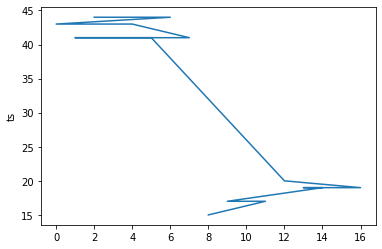

In [182]:
import matplotlib.pyplot as plt
plt.plot(materiom['ts'].sort_values())
plt.ylabel('ts')
plt.show()

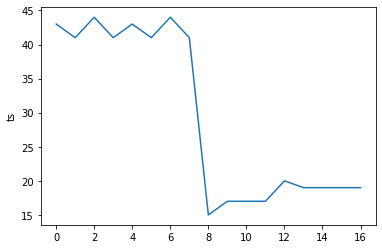

In [183]:
import matplotlib.pyplot as plt
plt.plot(materiom['ts'])
plt.ylabel('ts')
plt.show()

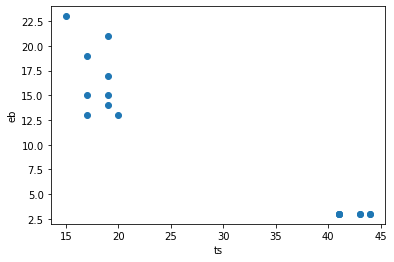

In [186]:
import matplotlib.pyplot as plt
plt.scatter(materiom['ts'], materiom['eb'])
plt.xlabel('ts')
plt.ylabel('eb')
plt.show()